<a href="https://colab.research.google.com/github/LeoPich/Projects/blob/main/Machine_Learning_Projects/Prediction%20of%20authors%E2%80%99%20birth%20years%20from%20word%20occurrence%20patterns%20in%20literary%20texts/Programme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score , LeaveOneOut
from sklearn.linear_model import LassoLars, Lasso
import warnings
warnings.filterwarnings('ignore')

X = np.loadtxt("Auteurs.csv",delimiter=" ",dtype=str)
Auteurs=X[2:,0]
Gram=X[1,1:]
Mots =X[0,1:]
X=X[2:,1:].astype(float)
Nat=np.loadtxt("AuteursNat.csv",delimiter=",",skiprows=1,usecols=[1])


scaler=StandardScaler(with_mean=False,with_std=False)

In [2]:
!pip install numpy==1.23.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 35.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 423, in run
    _, build_failures = build(
                        ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/wheel_builder.py", line 319, in build
    wheel_file = _build_one(
                 ^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-pa

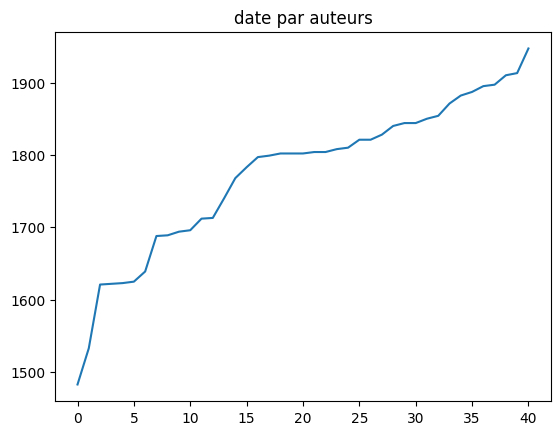

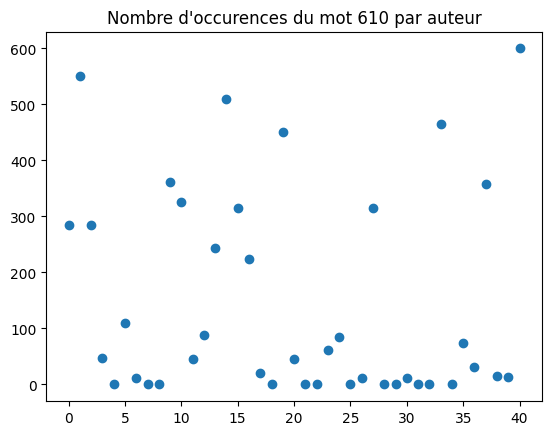

Mot 610 = parfois


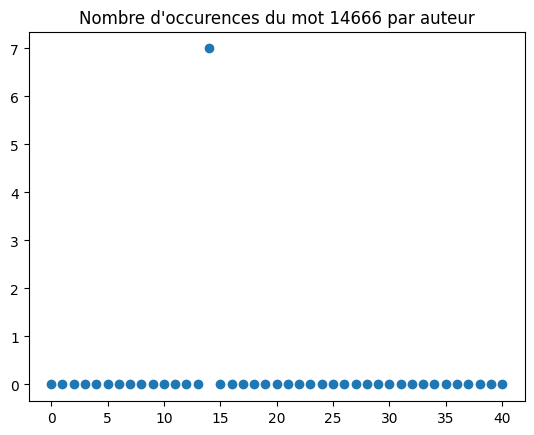

Mot 14666 = fougeraie


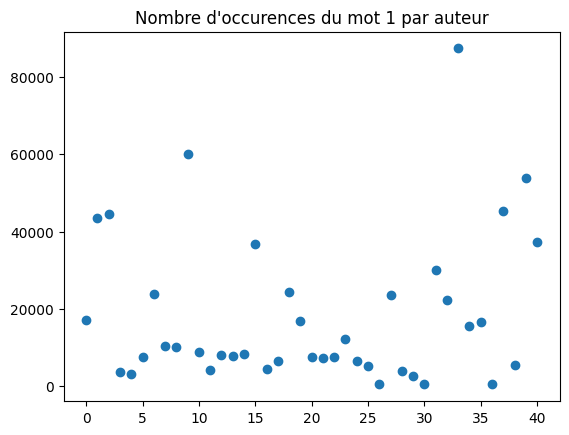

Mot 1 = ne


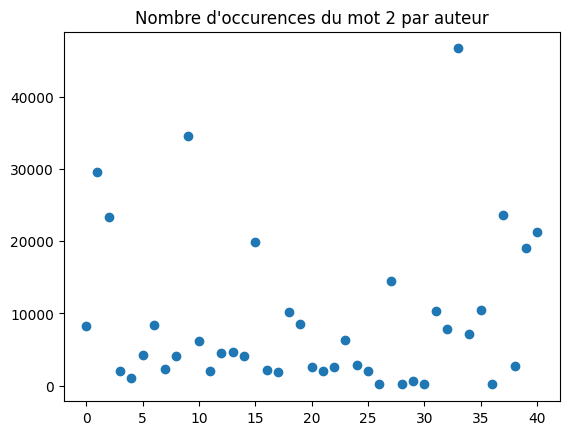

Mot 2 = pas


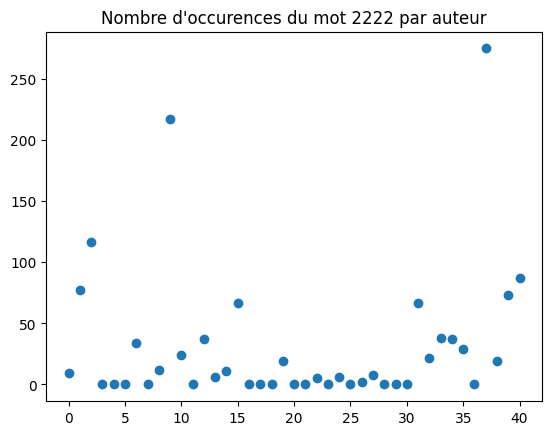

Mot 2222 = manoeuvre


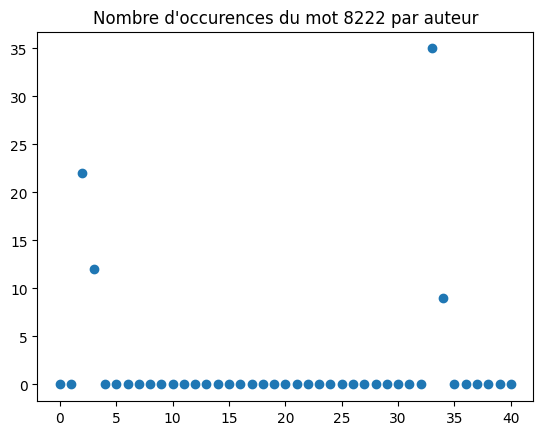

Mot 8222 = clairvoyant


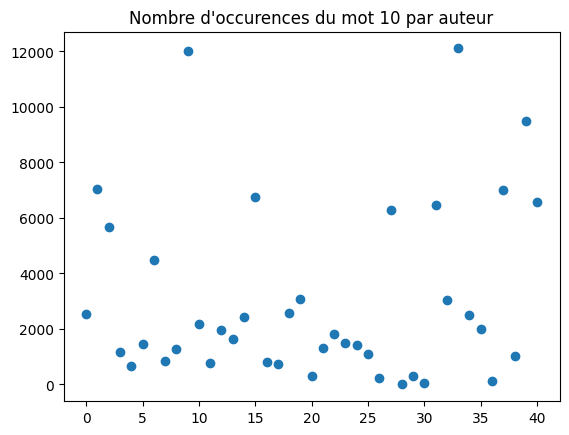

Mot 10 = même


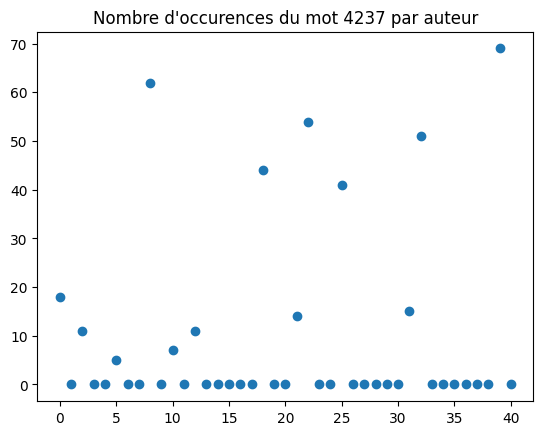

Mot 4237 = infinité


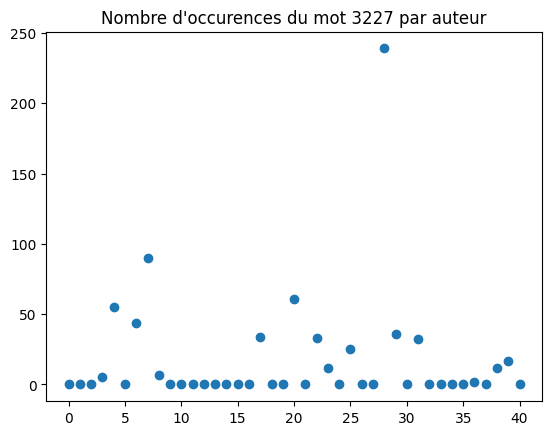

Mot 3227 = jusques


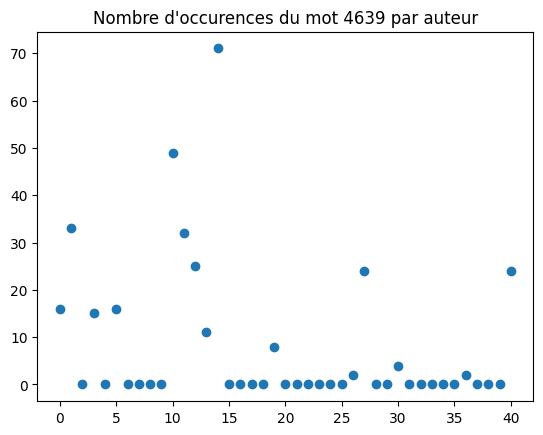

Mot 4639 = rythme


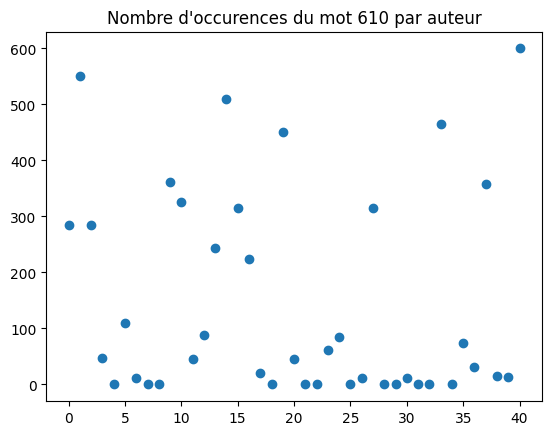

Mot 610 = parfois


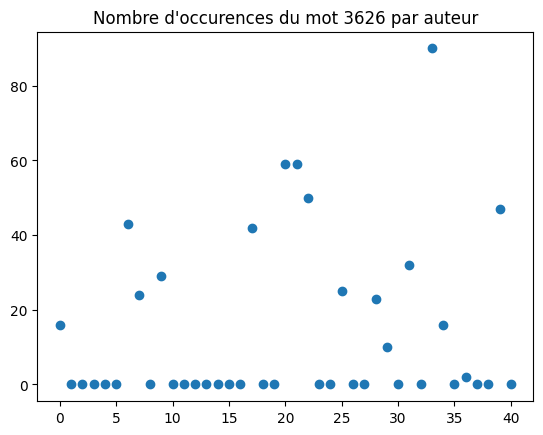

Mot 3626 = ouïr


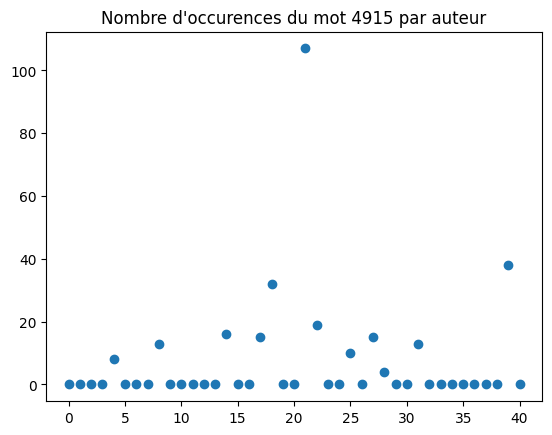

Mot 4915 = commodité


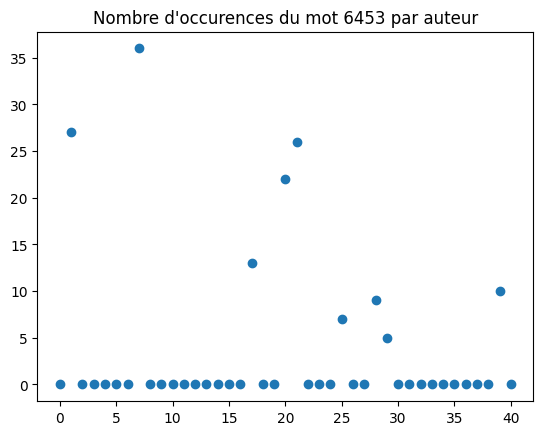

Mot 6453 = die


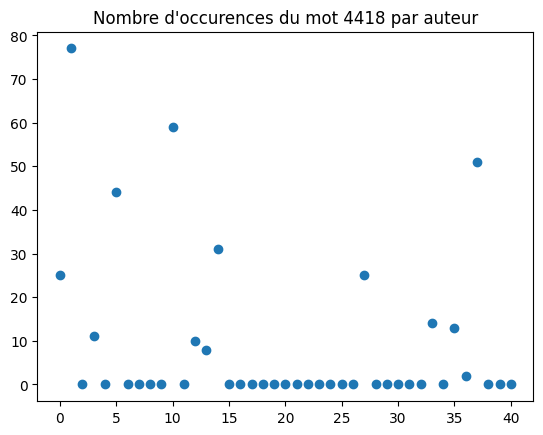

Mot 4418 = finalement


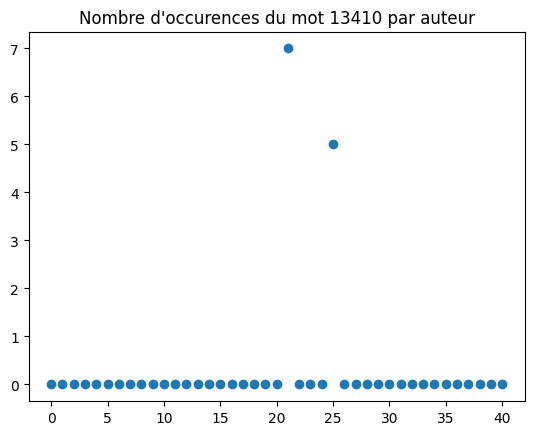

Mot 13410 = omnium


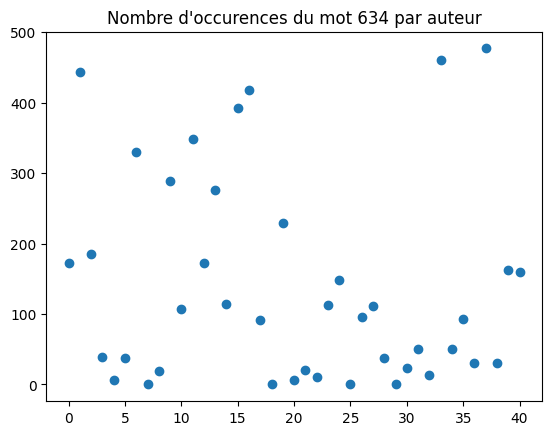

Mot 634 = oiseau


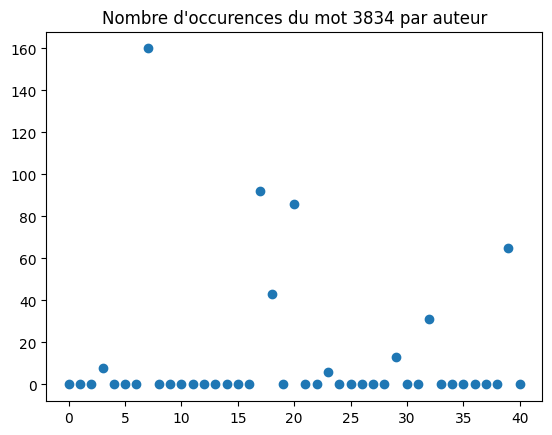

Mot 3834 = appas


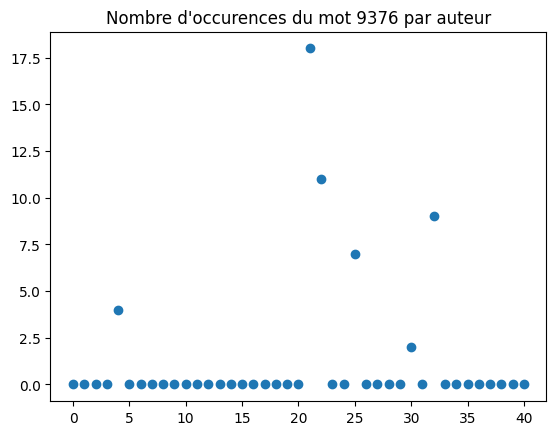

Mot 9376 = dérèglement


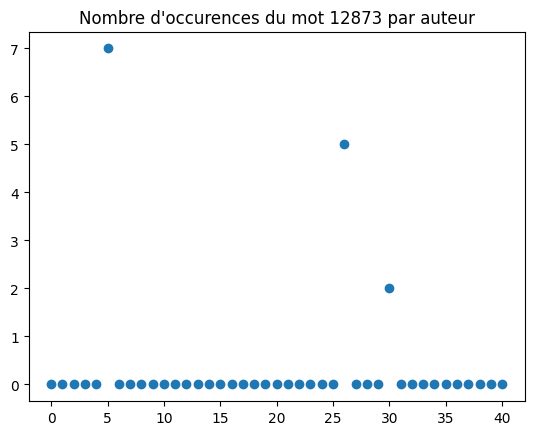

Mot 12873 = aine


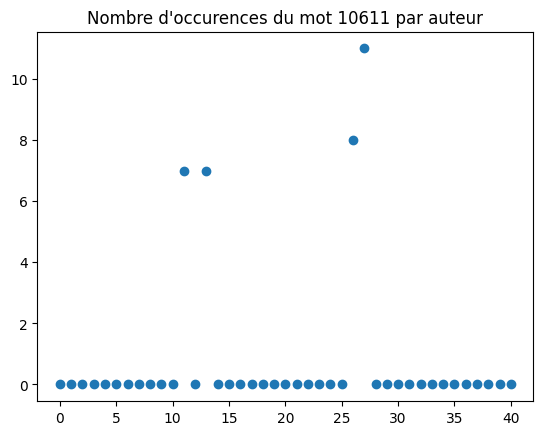

Mot 10611 = pollen


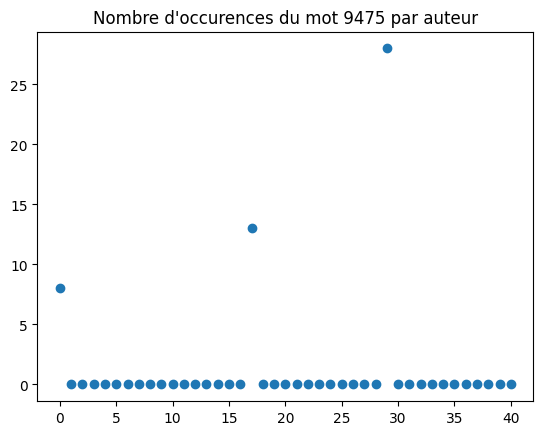

Mot 9475 = phoenix


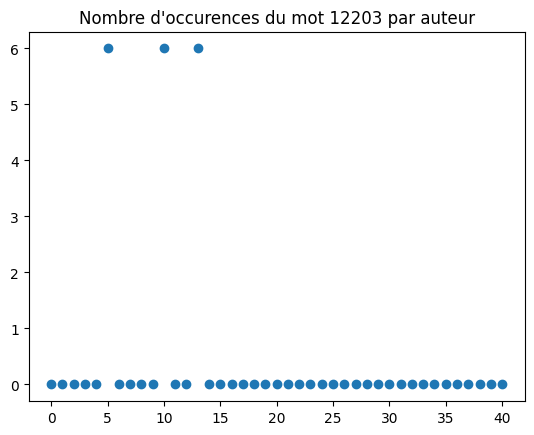

Mot 12203 = motocyclette


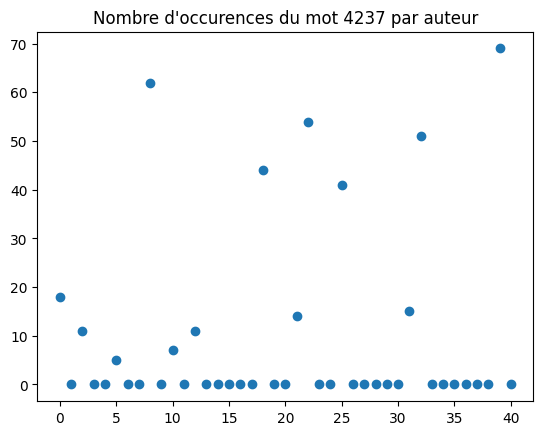

Mot 4237 = infinité


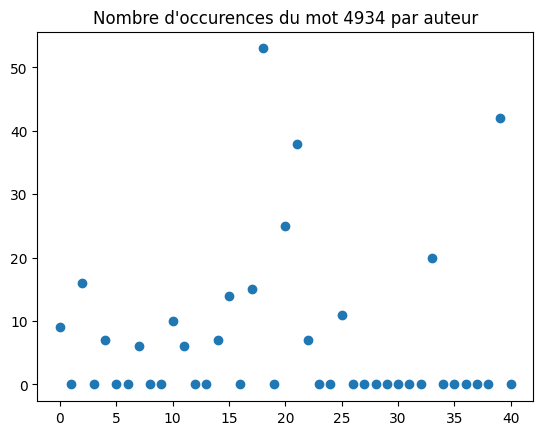

Mot 4934 = accommoder


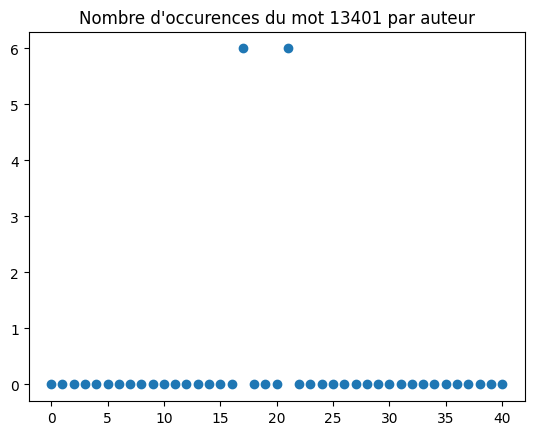

Mot 13401 = déloger


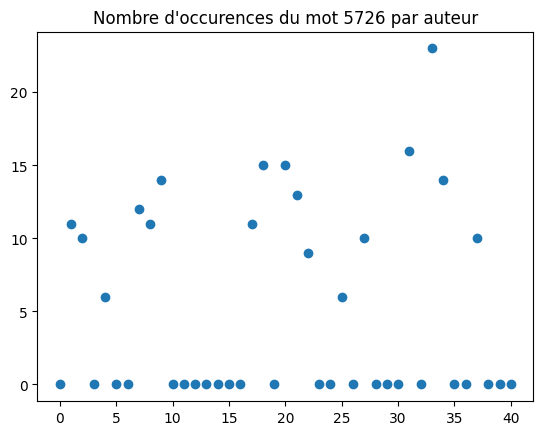

Mot 5726 = incommoder


In [3]:
### Présentation des données --------------------------------------------------
sortNat=sorted(Nat)
plt.figure()
plt.plot(range(41),sortNat)
plt.title('date par auteurs')
plt.show()

Nat_Auteurs=[[Auteurs[i],Nat[i]] for i in range(41)]

def fonction_cle(l) :
    return l[1]

Nat_Auteurs.sort(key=fonction_cle)
# print('le tableu des auteurs et leur date de naissance:',Nat_Auteurs)

k=610 #A modifier selon la convenance

def print_k(k):
    #plt.plot(sortNat,X[:,k],'o')
    plt.plot(range(41),X[:,k],'o')
    plt.title(f"Nombre d'occurences du mot {k} par auteur")
    plt.show()
    print(f"Mot {k} = {Mots[k]}")

print_k(k)
print_k(14666)
print_k(1)
print_k(2)
print_k(2222)
print_k(8222)
print_k(10)
print_k(4237)

for k in [3227, 4639, 610, 3626, 4915, 6453, 4418, 13410, 634, 3834, 9376, 12873, 10611, 9475, 12203, 4237, 4934, 13401, 5726]:
  print_k(k)



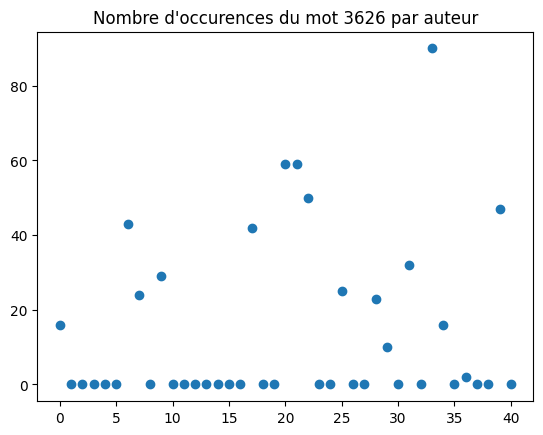

Mot 3626 = ouïr


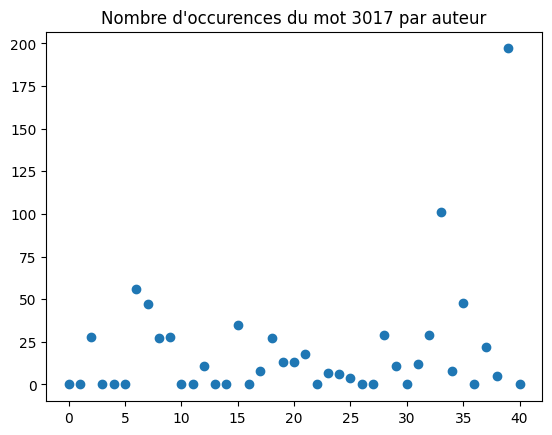

Mot 3017 = secourir


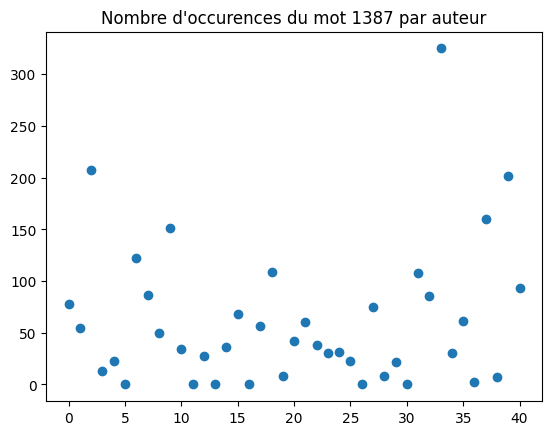

Mot 1387 = entretenir


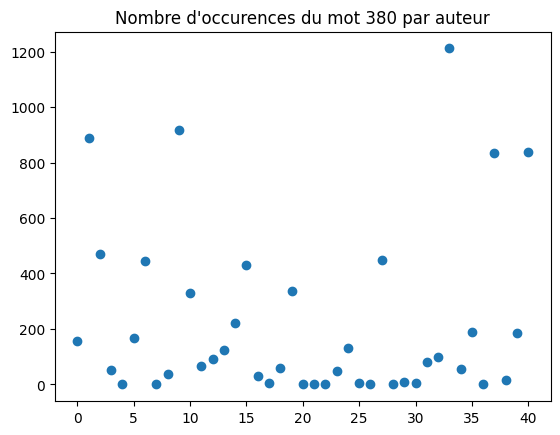

Mot 380 = retrouver


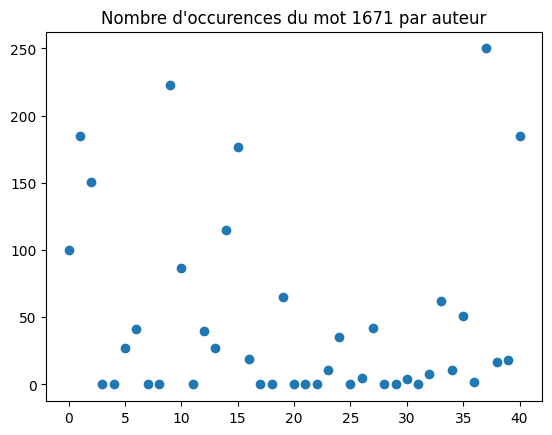

Mot 1671 = quai


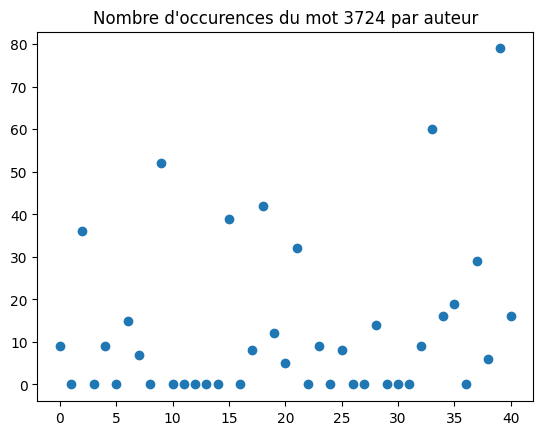

Mot 3724 = hardiment


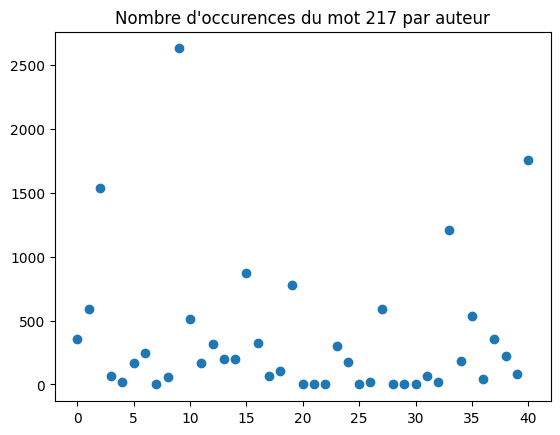

Mot 217 = sourire


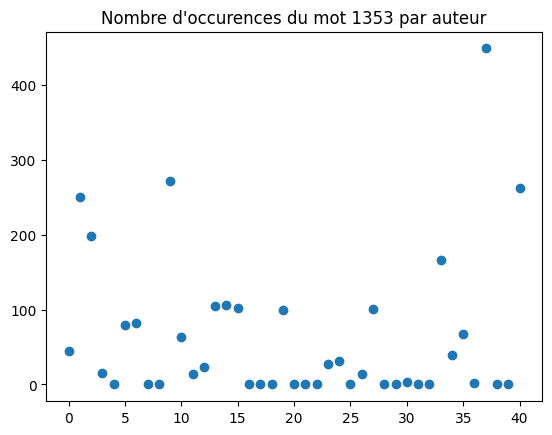

Mot 1353 = chance


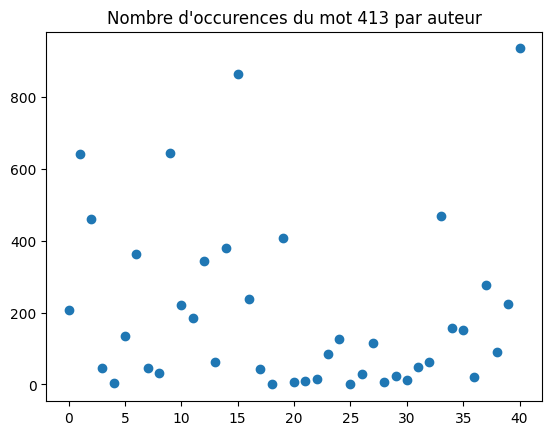

Mot 413 = mur


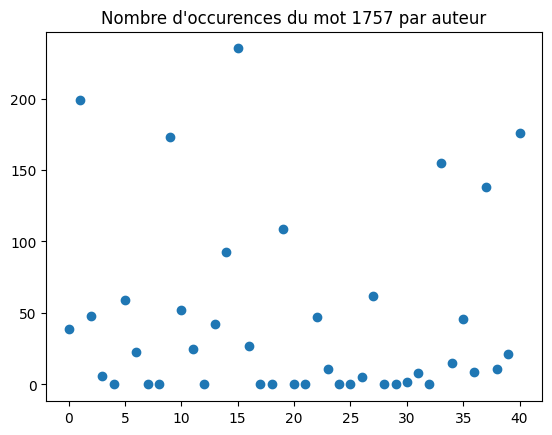

Mot 1757 = appel


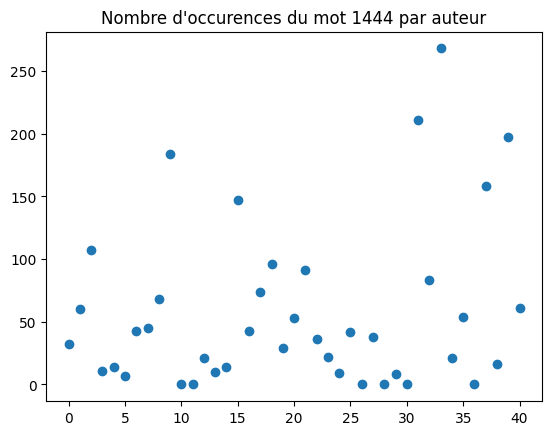

Mot 1444 = pourvoir


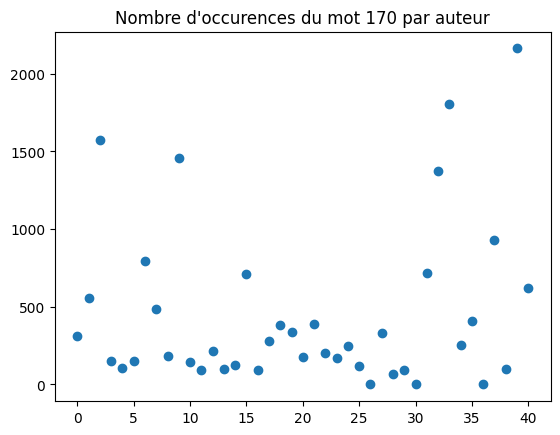

Mot 170 = servir


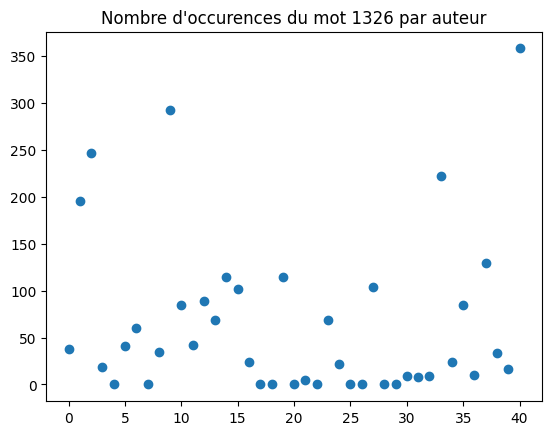

Mot 1326 = rideau


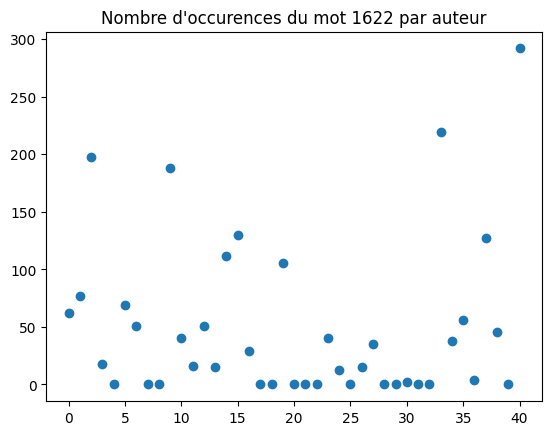

Mot 1622 = silencieux


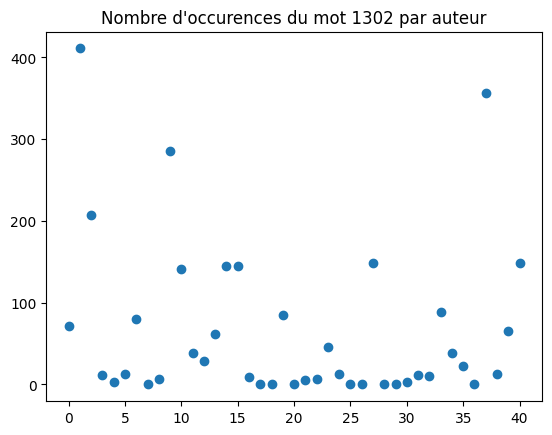

Mot 1302 = carte


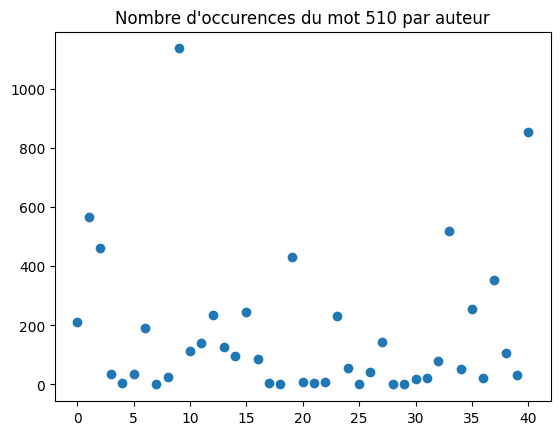

Mot 510 = lèvre


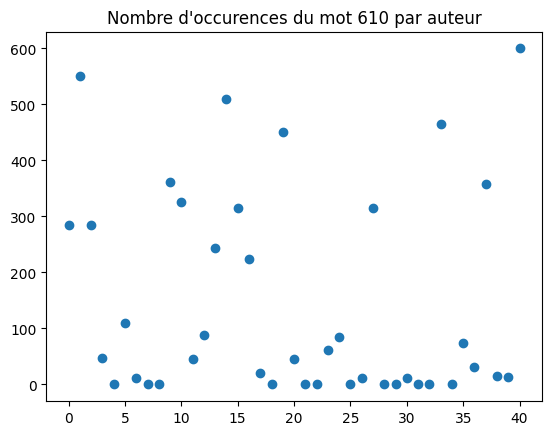

Mot 610 = parfois


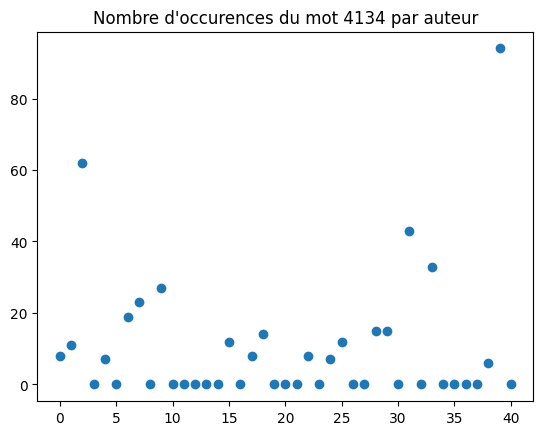

Mot 4134 = arbitre


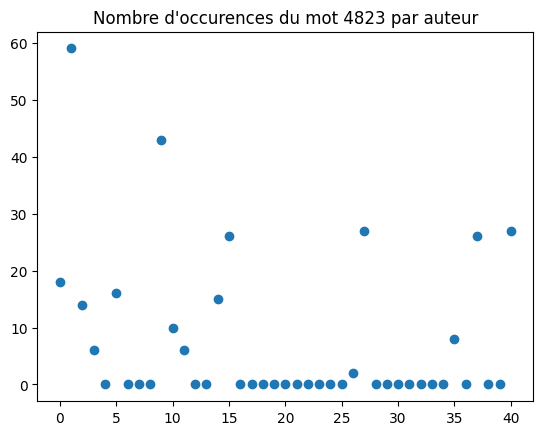

Mot 4823 = évolution


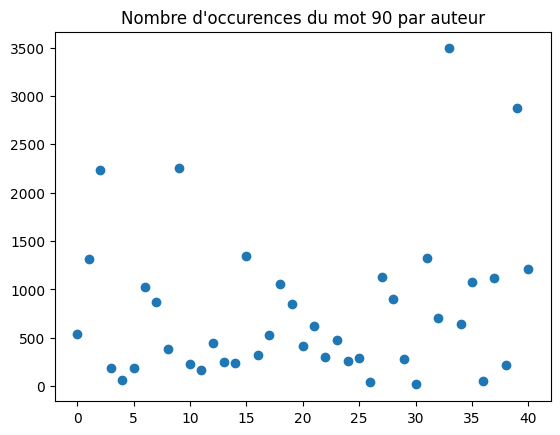

Mot 90 = tant


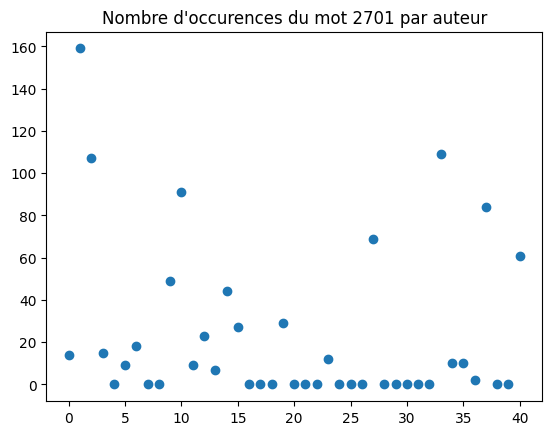

Mot 2701 = cadre


In [4]:
for k in [3626, 3017, 1387, 380, 1671, 3724, 217, 1353, 413, 1757, 1444, 170, 1326, 1622, 1302, 510, 610, 4134, 4823, 90, 2701]:
  print_k(k)

In [5]:
#### DONNEES BRUTES ####
print('\n ##### DONNEES BRUTES ##### \n')

### Régression linéaire sur tout X --------------------------------------------

reg=LinearRegression()
reg.fit(X,Nat)
Ypred=reg.predict(X)

#Calcul des erreurs sur cette régression

RMSE=mean_squared_error(Nat, Ypred)
R2=r2_score(Nat, Ypred)

CV=-np.mean(cross_val_score(reg, X, Nat, cv=10,scoring='neg_mean_squared_error'))
print('RMSE = ',RMSE)
print('R2 = ',R2)
print('score cv = ',CV)




 ##### DONNEES BRUTES ##### 

RMSE =  1.786143075673282e-20
R2 =  1.0
score cv =  76801.5617901162



 ## Lasso ## 


 # Choix du paramètre alpha # 

62712.787203312735 alpha= 79.43282347242878


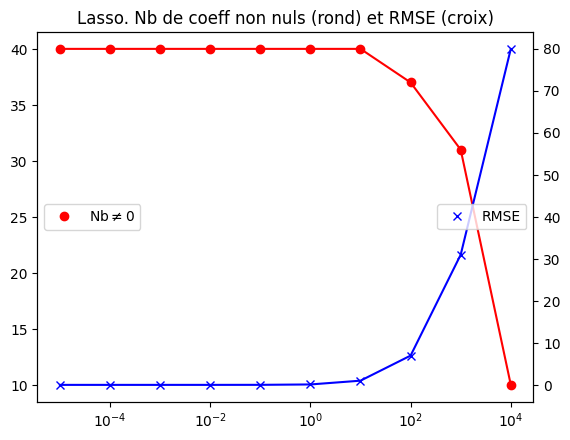

In [6]:

### Lasso sur tout X pour réduire le nombre de variables utiles ---------------
print('\n ## Lasso ## \n')
##Choix du paramètre alpha
print('\n # Choix du paramètre alpha # \n')
alphas =  10.**np.arange(-5,5)
nco=alphas*0
rmse=np.zeros(len(alphas))
for j,a in enumerate(alphas):
    reg = LassoLars(alpha=a)
    reg.fit(X,Nat)
    nco[j]=sum(abs(reg.coef_)>1.e-16)
    rmse[j]=np.sqrt(np.mean((reg.predict(X)-Nat)**2))

# Nombre de coefficients non nuls et RMSE

plt.subplots()
plt.semilogx()
plt.title('Lasso. Nb de coeff non nuls (rond) et RMSE (croix)')
plt.plot(alphas,nco,'r')
plt.plot(alphas,nco,'ro',label=r"Nb$\ne$0")
plt.legend(loc='center left')
plt.twinx()
plt.plot(alphas,rmse,'b')
plt.plot(alphas,rmse,'bx',label="RMSE")
plt.legend(loc='center right')

##Choix plus précis de alpha entre 10**-2 et 10**2 par cross validation

CV_choix_alpha=[]
for alpha in 10.**np.arange(-2,2,0.1):
    CV_choix_alpha.append(-np.mean(cross_val_score(LassoLars(alpha), X, Nat, cv=10,scoring='neg_mean_squared_error')))

alpha=(10.**np.arange(-2,2,0.1))[np.where(CV_choix_alpha==min(CV_choix_alpha))][0]
print(min(CV_choix_alpha),'alpha=',alpha)

#alpha=2.5118864315095926


Meilleur alpha par validation croisée : 79.43282347242878
Score CV minimal : 62712.787203312735


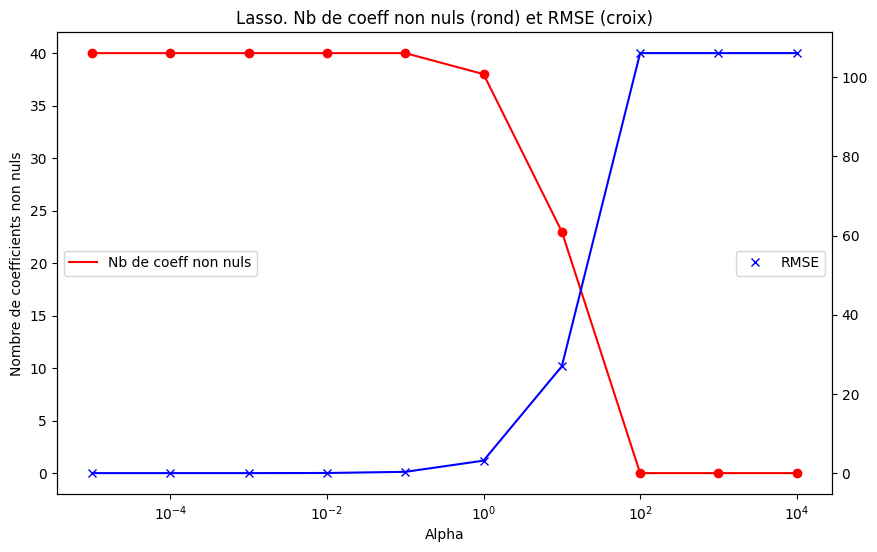

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLars
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

# Choix du paramètre alpha
alphas = 10.**np.arange(-5,5)
nco = np.zeros(len(alphas))
rmse = np.zeros(len(alphas))

# Calcul du nombre de coefficients non nuls et du RMSE pour chaque alpha
for j, a in enumerate(alphas):
    # Utilisation d'un pipeline pour la normalisation et le modèle LassoLars
    reg = make_pipeline(StandardScaler(with_mean=False), LassoLars(alpha=a))
    reg.fit(X, Nat)
    nco[j] = sum(abs(reg.named_steps['lassolars'].coef_) > 1.e-16)  # Nombre de coefficients non nuls
    rmse[j] = np.sqrt(np.mean((reg.predict(X) - Nat)**2))  # RMSE

# Visualisation du nombre de coefficients non nuls et du RMSE
plt.figure(figsize=(10,6))
plt.semilogx(alphas, nco, 'r', label="Nb de coeff non nuls")
plt.plot(alphas, nco, 'ro')
plt.legend(loc='center left')
plt.title('Lasso. Nb de coeff non nuls (rond) et RMSE (croix)')
plt.xlabel('Alpha')
plt.ylabel('Nombre de coefficients non nuls')

# Ajout de la courbe RMSE
plt.twinx()
plt.plot(alphas, rmse, 'b')
plt.plot(alphas, rmse, 'bx', label="RMSE")
plt.legend(loc='center right')

# Recherche plus précise de alpha par validation croisée
CV_choix_alpha = []
for alpha in 10.**np.arange(-2, 2, 0.1):
    CV_choix_alpha.append(-np.mean(cross_val_score(LassoLars(alpha), X, Nat, cv=10, scoring='neg_mean_squared_error')))

# Choisir le meilleur alpha
alpha_best = (10.**np.arange(-2,2,0.1))[np.argmin(CV_choix_alpha)]
min_cv = min(CV_choix_alpha)

# Affichage du meilleur alpha
print(f"Meilleur alpha par validation croisée : {alpha_best}")
print(f"Score CV minimal : {min_cv}")

plt.show()

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample

# Réduire la plage d'alpha pour limiter le calcul
CV_choix_alpha = []
for alpha in 10.**np.arange(-2, 2, 0.5):  # Plage encore plus réduite
    CV_choix_alpha.append(-np.mean(cross_val_score(LassoLars(alpha), X, Nat, cv=5, scoring='neg_mean_squared_error')))  # Moins de folds

# Choisir le meilleur alpha
alpha_best = (10.**np.arange(-2,2,0.5))[np.argmin(CV_choix_alpha)]
min_cv = min(CV_choix_alpha)

# Affichage du meilleur alpha
print(f"Meilleur alpha par validation croisée : {alpha_best}")
print(f"Score CV minimal : {min_cv}")

Meilleur alpha par validation croisée : 31.622776601683793
Score CV minimal : 121678.8220952646


In [9]:
##Exécution du LassoLars avec le alpha choisi
print('\n # Exécution # \n')
alpha=2.5118864315095926

reg2=LassoLars(alpha)
reg2.fit(X,Nat)
indices_importants=reg2.active_
print(indices_importants)
print("\n Les mots importants sont:", Mots[indices_importants])


###Régression linéaire sur les variables restantes, on espère avoir une score cv mieux
print('\n ## Régression linéaire ## \n')
Xred=X[:,indices_importants]
reg=LinearRegression()
reg.fit(Xred,Nat)
Ypred=reg.predict(Xred)

#Calcul des erreurs sur cette régression

RMSEred=mean_squared_error(Nat, Ypred)
R2red=r2_score(Nat, Ypred)
CVred=-np.mean(cross_val_score(reg, Xred, Nat, cv=10,scoring='neg_mean_squared_error'))
print('\n RMSE avec X réduit = ',RMSEred)
print('R2 avec X réduit = ',R2red)
print('score cv avec X réduit = ',CVred)




 # Exécution # 

[np.int64(2), np.int64(1), np.int64(0), np.int64(90), np.int64(43), np.int64(34), np.int64(56), np.int64(11), np.int64(64), np.int64(61), np.int64(50), np.int64(28), np.int64(330), np.int64(206), np.int64(83), np.int64(75), np.int64(88), np.int64(125), np.int64(69), np.int64(205), np.int64(119), np.int64(93), np.int64(38), np.int64(117), np.int64(72), np.int64(23), np.int64(7), np.int64(82), np.int64(40), np.int64(31), np.int64(4), np.int64(165), np.int64(8), np.int64(19), np.int64(221), np.int64(26), np.int64(76), np.int64(20), np.int64(12), np.int64(344)]

 Les mots importants sont: ['pas' 'ne' 'être' 'tant' 'aimer' 'chose' 'coeur' 'aller' 'très' 'alors'
 'heure' 'peu' 'seigneur' 'mer' 'madame' 'père' 'saint' 'idée' 'ainsi'
 'loi' 'gens' 'esprit' 'oeil' 'âme' 'roi' 'jour' 'pouvoir' 'amour'
 'jamais' 'bon' 'faire' 'noir' 'voir' 'prendre' 'histoire' 'petit' 'fille'
 'là' 'homme' 'fortune']

 ## Régression linéaire ## 


 RMSE avec X réduit =  2.900175928158481e-25
R2 


 ## Réduction à la main ## 


 Le mot à enlever est âme
RMSE avec X réduit 2 =  0.5458019851047956
R2 avec X réduit 2 =  0.9999514799781909
score cv avec X réduit 2 =  13513.003158382979

 Le mot à enlever est petit
RMSE avec X réduit 3 =  0.5764713372263053
R2 avec X réduit 3 =  0.9999487535725082
score cv avec X réduit 3 =  3846.7458134583258

 Le mot à enlever est homme
RMSE avec X réduit 4 =  0.6311601867554982
R2 avec X réduit 4 =  0.999943891911605
score cv avec X réduit 4 =  2619.940398197165

 ## Ridge ## 



<Figure size 640x480 with 0 Axes>

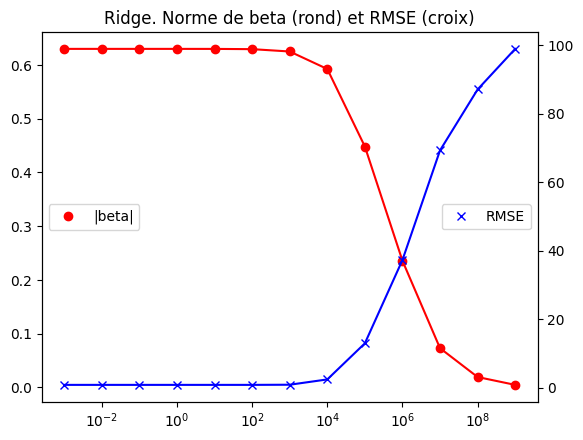


 # Choix du beta # 

2000.257934418276 beta= 251.18864315095772

 # Exécution # 

RMSE avec X réduit 4 puis ridge =  0.6360695256993956
R2 avec X réduit 4 puis ridge =  0.9999434554873355
score cv avec X réduit 4 puis ridge =  2000.257934418276


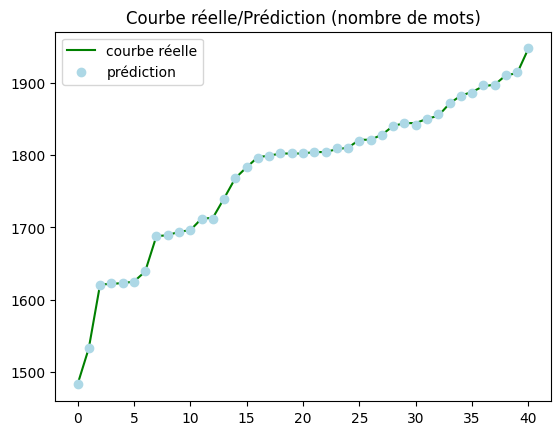

Ecart moyen entre la prédiction et la valeur réelle :  0.5049603473840739

 ##### FREQUENCE ##### 



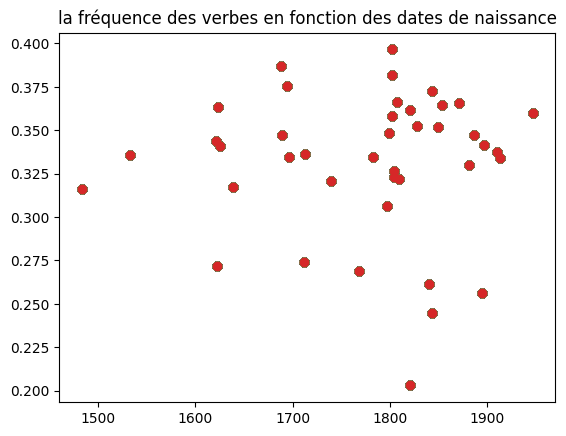

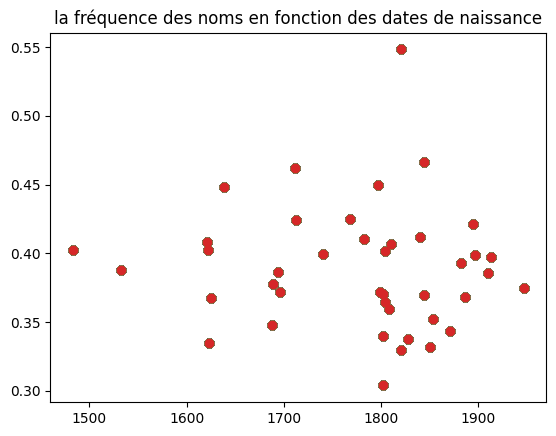

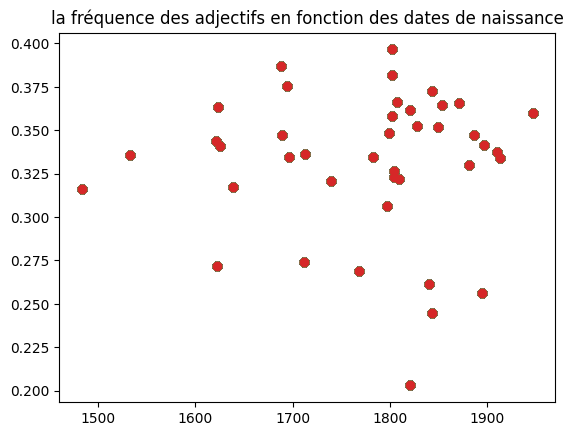

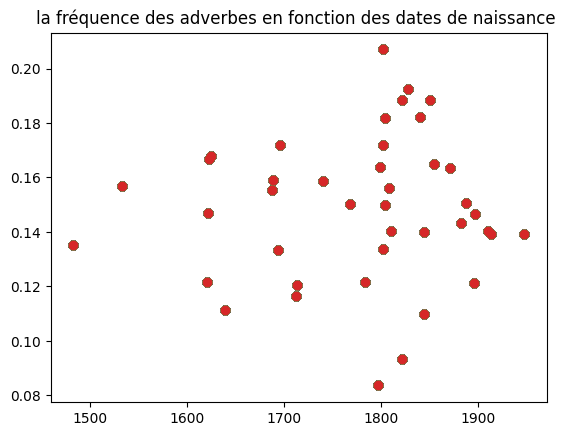

RMSE =  1.0516290104713796e-24
R2 =  1.0
score cv =  1334.08701920901

 ## Lasso ## 


 # Choix du paramètre alpha # 

1754.9689269156395 alpha= 0.01995262314968881

 # Exécution # 

 
 les Mots selectionnées sont: ['ne' 'pas' 'faire' 'être' 'dire' 'dieu' 'mer' 'homme']
[np.int64(1), np.int64(2), np.int64(4), np.int64(0), np.int64(5), np.int64(60), np.int64(206), np.int64(12)]

 ## Régression linéaire ## 


 RMSE avec X réduit =  884.5506770328448
R2 avec X réduit =  0.9213663209146068
score cv avec X réduit =  2756.359249221482

 ## Réduction à la main ## 


 Le mot à enlever est mer
RMSE avec X réduit 2 =  935.7143263702977
R2 avec X réduit 2 =  0.9168180388463206
score cv avec X réduit 2 =  1300.480933690344

 Le mot à enlever est dieu
RMSE avec X réduit 3 =  1037.0048801392577
R2 avec X réduit 3 =  0.9078136379609268
score cv avec X réduit 3 =  1380.787480142556
 
 Le mot à enlever est faire
RMSE avec X réduit 4 =  1104.3018918037824
R2 avec X réduit 4 =  0.9018311524391418
score c

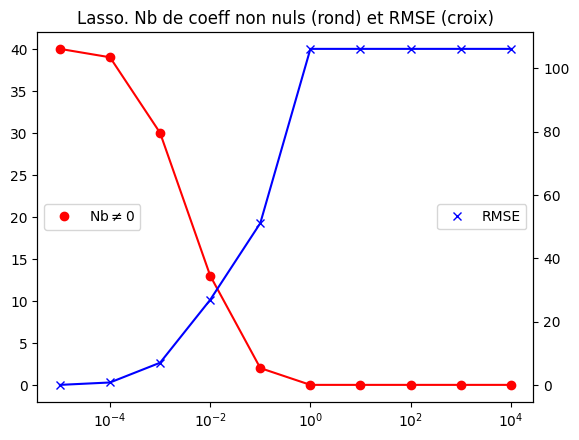

<Figure size 640x480 with 0 Axes>

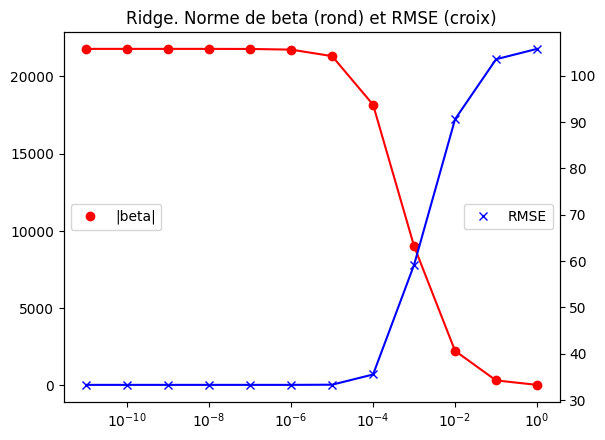

1455.8996523647077 beta= 2.511886431509469e-05

 # Exécution # 

RMSE avec X réduit 4 puis ridge =  1118.3007635827762
R2 avec X réduit 4 puis ridge =  0.9005866982551041
score cv avec X réduit 4 puis ridge =  1455.8996523647077


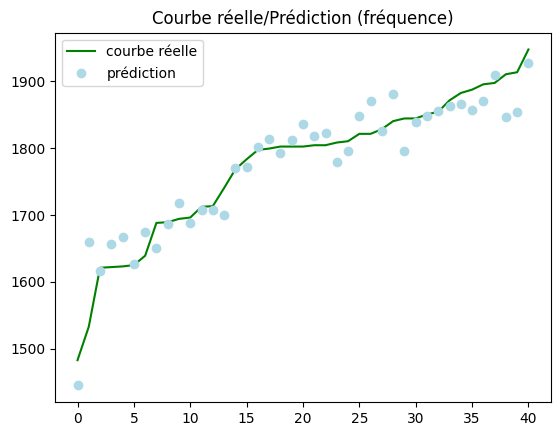

Ecart moyen entre la prédiction et la valeur réelle :  23.832592552386593

 ### ANOVA ### 

              voc    être     ne    pas   tout  faire   dire   plus  pouvoir  \
0         AFrance   31268  17065   8332   7191   6039   5890   5681     3859   
1          Aragon   76567  43430  29516  21004  17452  15358  11270    14416   
2          Balzac   81565  44549  23372  22075  21780  26337  16447    15791   
3      Baudelaire    9021   3737   2070   2828   1747   1250   2369     1495   
4         Bruyere    4626   3095   1010   1169   1377    682   1075      653   
5           Camus   13885   7431   4278   3508   2227   2197   2524     2533   
6   Chateaubriand   42084  23874   8414   9799   8950   5400   8195     6711   
7       Corneille   12072  10274   2307   4321   5204   1690   3806     3964   
8         Diderot   17141  10095   4122   3481   3482   2926   3125     2329   
9           Dumas  122481  60094  34612  30215  35273  46449  19714    19619   
10        Echenoz   13927   

In [10]:


### Réduire encore le nombre de variables en les enlevant une par une et en calculant un scrore CV
print('\n ## Réduction à la main ## \n')
CVbis=[]
m=[]
for i in range(len(indices_importants)):
    ind2=indices_importants.copy()
    ind2.pop(i)
    LinearRegression().fit(X[:,ind2],Nat)
    m.append(-np.mean(cross_val_score(LinearRegression(),X[:,ind2],Nat,cv=10,scoring='neg_mean_squared_error')))
    CVbis.append([indices_importants[i],m[-1]])


ind_min=CVbis[0][0]
CVmin=CVbis[0][1]
for a in CVbis:
    if a[1]<CVmin:
        CVmin=a[1]
        ind_min=a[0]

#print(CVbis)
#print(ind_min)
print('\n Le mot à enlever est', Mots[ind_min])

#On enlève la variable de score cv minimal

indices_importants2=indices_importants.copy()
c=np.where(indices_importants==ind_min)
indices_importants2.pop(c[0][0])
Xred2=X[:,indices_importants2]
reg=LinearRegression()
reg.fit(Xred2,Nat)
Ypred2=reg.predict(Xred2)

#Calcul des erreurs après cette nouvelle réduction
RMSEred2=mean_squared_error(Nat, Ypred2)
R2red2=r2_score(Nat, Ypred2)
CVred2=-np.mean(cross_val_score(reg, Xred2, Nat, cv=10,scoring='neg_mean_squared_error'))
print('RMSE avec X réduit 2 = ',RMSEred2)
print('R2 avec X réduit 2 = ',R2red2)
print('score cv avec X réduit 2 = ',CVred2)

#On en elève encore une

CVbis=[]
m=[]
for i in range(len(indices_importants2)):
    ind2=indices_importants2.copy()
    ind2.pop(i)
    LinearRegression().fit(X[:,ind2],Nat)
    m.append(-np.mean(cross_val_score(LinearRegression(),X[:,ind2],Nat,cv=10,scoring='neg_mean_squared_error')))
    CVbis.append([indices_importants2[i],m[-1]])


ind_min=CVbis[0][0]
CVmin=CVbis[0][1]
for a in CVbis:
    if a[1]<CVmin:
        CVmin=a[1]
        ind_min=a[0]

# print(CVbis)
# print(ind_min)
print('\n Le mot à enlever est', Mots[ind_min])

#On enlève la variable de score cv minimal

indices_importants3=indices_importants2.copy()
c=np.where(indices_importants2==ind_min)
indices_importants3.pop(c[0][0])
Xred3=X[:,indices_importants3]
reg=LinearRegression()
reg.fit(Xred3,Nat)
Ypred3=reg.predict(Xred3)

#Calcul des erreurs après cette nouvelle réduction
RMSEred3=mean_squared_error(Nat, Ypred3)
R2red3=r2_score(Nat, Ypred3)
CVred3=-np.mean(cross_val_score(reg, Xred3, Nat, cv=10,scoring='neg_mean_squared_error'))
print('RMSE avec X réduit 3 = ',RMSEred3)
print('R2 avec X réduit 3 = ',R2red3)
print('score cv avec X réduit 3 = ',CVred3)


#Encore

CVbis=[]
m=[]
for i in range(len(indices_importants3)):
    ind2=indices_importants3.copy()
    ind2.pop(i)
    LinearRegression().fit(X[:,ind2],Nat)
    m.append(-np.mean(cross_val_score(LinearRegression(),X[:,ind2],Nat,cv=10,scoring='neg_mean_squared_error')))
    CVbis.append([indices_importants3[i],m[-1]])


ind_min=CVbis[0][0]
CVmin=CVbis[0][1]
for a in CVbis:
    if a[1]<CVmin:
        CVmin=a[1]
        ind_min=a[0]

# print(CVbis)
# print(ind_min)
print('\n Le mot à enlever est', Mots[ind_min])


#Encore

indices_importants4=indices_importants3.copy()
c=np.where(indices_importants3==ind_min)
indices_importants4.pop(c[0][0])
Xred4=X[:,indices_importants4]
reg=LinearRegression()
reg.fit(Xred4,Nat)
Ypred4=reg.predict(Xred4)

#Calcul des erreurs après cette nouvelle réduction
RMSEred4=mean_squared_error(Nat, Ypred4)
R2red4=r2_score(Nat, Ypred4)
CVred4=-np.mean(cross_val_score(reg, Xred4, Nat, cv=10,scoring='neg_mean_squared_error'))
print('RMSE avec X réduit 4 = ',RMSEred4)
print('R2 avec X réduit 4 = ',R2red4)
print('score cv avec X réduit 4 = ',CVred4)

### On fait un ridge avec les variables restantes (16)
print('\n ## Ridge ## \n')

from sklearn.linear_model import Ridge
plt.figure()
alphas =  10.**np.arange(-3,10)
# plt.figure()
# plt.suptitle('Regressions ridge')
# plt.subplots_adjust(hspace=.7,wspace=.5)
norbet=np.zeros(len(alphas))
rmse=np.zeros(len(alphas))
for j,a in enumerate(alphas):
    reg = Ridge(alpha=a)
    reg.fit(Xred4,Nat)
    norbet[j]=np.sqrt(np.sum(reg.coef_**2))
    rmse[j]=np.sqrt(np.mean((reg.predict(Xred4)-Nat)**2))
# L'évolution de la norme de beta et du RMSE donne aussi une idée du bon alpha.
plt.subplots()
plt.semilogx()
plt.title('Ridge. Norme de beta (rond) et RMSE (croix)')
plt.plot(alphas,norbet,'r')
plt.plot(alphas,norbet,'ro',label="|beta|")
plt.legend(loc='center left')
plt.twinx()
plt.plot(alphas,rmse,'b')
plt.plot(alphas,rmse,'bx',label="RMSE")
plt.legend(loc='center right')
plt.show()

CV_choix_beta=[]
for beta in 10.**np.arange(-1,5,0.1):
    CV_choix_beta.append(-np.mean(cross_val_score(Ridge(beta), Xred4, Nat, cv=10,scoring='neg_mean_squared_error')))

beta=(10.**np.arange(-1,5,0.1))[np.where(CV_choix_beta==min(CV_choix_beta))][0]
print('\n # Choix du beta # \n')
print(min(CV_choix_beta),'beta=',beta)

#On met en oeuvre le Ridge avec le paramètre beta choisi
print('\n # Exécution # \n')
reg = Ridge(beta)
reg.fit(Xred4,Nat)
Ypred_ridge=reg.predict(Xred4)

#On calcule les erreurs

RMSE_ridge=mean_squared_error(Nat, Ypred_ridge)
R2_ridge=r2_score(Nat, Ypred_ridge)
CV_ridge=-np.mean(cross_val_score(reg, Xred4, Nat, cv=10,scoring='neg_mean_squared_error'))
print('RMSE avec X réduit 4 puis ridge = ',RMSE_ridge)
print('R2 avec X réduit 4 puis ridge = ',R2_ridge)
print('score cv avec X réduit 4 puis ridge = ',CV_ridge)


#On trace le résultat obtenu après avoir enlevé toutes ces varaibles et fait un ridge


Nat_Ypred=[[Nat[i],Ypred_ridge[i]] for i in range(41)]

def fonction_cle(l) :
    return l[0]

Nat_Ypred.sort(key=fonction_cle)
# print(Nat_Ypred)

Nat_trie=[a[0] for a in Nat_Ypred]
Ypred_trie=[a[1] for a in Nat_Ypred]
plt.close()
plt.figure()
plt.plot(range(41),Nat_trie, color='green',label="courbe réelle")
plt.plot(range(41),Ypred_trie, 'o', color='lightblue',label="prédiction")
plt.title('Courbe réelle/Prédiction (nombre de mots)')
plt.legend()
plt.show()

ecart_brut=[]
for i in range (len(Nat_trie)) :
    ecart_brut.append(abs(Nat_trie[i]-Ypred_trie[i]))
print('Ecart moyen entre la prédiction et la valeur réelle : ',np.mean(ecart_brut))


##### FREQUENCE #####
print('\n ##### FREQUENCE ##### \n')

for j in range(len(Nat)):
    s = np.sum(X[j,:])
    X[j,:]=X[j,:]/s

### Représentation dans des graphiques ----------------------------------------
ind_ver=[]
ind_adv=[]
ind_adj=[]
ind_nom=[]
for i in range(len(Gram)):
    if Gram[i]=='VER': ind_ver.append(i)
    if Gram[i]=='ADV': ind_adv.append(i)
    if Gram[i]=='VER': ind_adj.append(i)
    if Gram[i]=='NOM': ind_nom.append(i)

Xver=X[:,ind_ver]
Xadv=X[:,ind_adv]
Xadj=X[:,ind_adj]
Xnom=X[:,ind_nom]

for j in range(len(Nat)):
    s=np.sum(X[j,:])
    Xver[j] = np.sum(Xver[j,:])/s
    Xadj[j] = np.sum(Xadj[j,:])/s
    Xadv[j]= np.sum(Xadv[j,:])/s
    Xnom[j] = np.sum(Xnom[j,:])/s


plt.plot(sortNat,Xver,'o')
plt.title('la fréquence des verbes en fonction des dates de naissance')
plt.show()
plt.plot(sortNat,Xnom,'o')
plt.title('la fréquence des noms en fonction des dates de naissance')
plt.show()
plt.plot(sortNat,Xadj,'o')
plt.title('la fréquence des adjectifs en fonction des dates de naissance')
plt.show()
plt.plot(sortNat,Xadv,'o')
plt.title('la fréquence des adverbes en fonction des dates de naissance ')
plt.show()

### Conclusion on ne peut pas juste s'interesser à la frequences des verbes noms adverbes et adjectifs
### Régression linéaire sur tout X -----------------------------------------

reg=LinearRegression()
reg.fit(X,Nat)
Ypred=reg.predict(X)

#Calcul des erreurs sur cette régression

RMSE=mean_squared_error(Nat, Ypred)
R2=r2_score(Nat, Ypred)

CV=-np.mean(cross_val_score(reg, X, Nat, cv=10,scoring='neg_mean_squared_error'))
print('RMSE = ',RMSE)
print('R2 = ',R2)
print('score cv = ',CV)


###Lasso sur tout X pour réduire le nombre de variables utiles
print('\n ## Lasso ## \n')
##Choix du paramètre alpha
print('\n # Choix du paramètre alpha # \n')
alphas =  10.**np.arange(-5,5)
nco=alphas*0
rmse=np.zeros(len(alphas))
for j,a in enumerate(alphas):
    reg = LassoLars(alpha=a)
    reg.fit(X,Nat)
    nco[j]=sum(abs(reg.coef_)>1.e-16)
    rmse[j]=np.sqrt(np.mean((reg.predict(X)-Nat)**2))

# Nombre de coefficients non nuls et RMSE
plt.subplots()
plt.semilogx()
plt.title('Lasso. Nb de coeff non nuls (rond) et RMSE (croix)')
plt.plot(alphas,nco,'r')
plt.plot(alphas,nco,'ro',label=r"Nb$\ne$0")
plt.legend(loc='center left')
plt.twinx()
plt.plot(alphas,rmse,'b')
plt.plot(alphas,rmse,'bx',label="RMSE")
plt.legend(loc='center right')

##Choix plus précis de alpha entre 10**-2 et 10**2 par cross validation

CV_choix_alpha=[]
for alpha in 10.**np.arange(-2,2,0.1):
     CV_choix_alpha.append(-np.mean(cross_val_score(LassoLars(alpha), X, Nat, cv=10,scoring='neg_mean_squared_error')))

alpha=(10.**np.arange(-2,2,0.1))[np.where(CV_choix_alpha==min(CV_choix_alpha))][0]
print(min(CV_choix_alpha),'alpha=',alpha)

#alpha=2.5118864315095926

##Exécution du LassoLars avec le alpha choisi
print('\n # Exécution # \n')

reg2=LassoLars(alpha)
reg2.fit(X,Nat)
indices_importants=reg2.active_
print(" \n les Mots selectionnées sont:", Mots[indices_importants] )
print(indices_importants)

###Régression linéaire sur les variables restantes, on espère avoir une score cv mieux
print('\n ## Régression linéaire ## \n')
Xred=X[:,indices_importants]
reg=LinearRegression()
reg.fit(Xred,Nat)
Ypred=reg.predict(Xred)

#Calcul des erreurs sur cette régression

RMSEred=mean_squared_error(Nat, Ypred)
R2red=r2_score(Nat, Ypred)
CVred=-np.mean(cross_val_score(reg, Xred, Nat, cv=10,scoring='neg_mean_squared_error'))
print('\n RMSE avec X réduit = ',RMSEred)
print('R2 avec X réduit = ',R2red)
print('score cv avec X réduit = ',CVred)


### Réduire encore le nombre de variables en les enlevant une par une et en calculant un scrore CV
print('\n ## Réduction à la main ## \n')
CVbis=[]
m=[]
for i in range(len(indices_importants)):
    ind2=indices_importants.copy()
    ind2.pop(i)
    LinearRegression().fit(X[:,ind2],Nat)
    m.append(-np.mean(cross_val_score(LinearRegression(),X[:,ind2],Nat,cv=10,scoring='neg_mean_squared_error')))
    CVbis.append([indices_importants[i],m[-1]])


ind_min=CVbis[0][0]
CVmin=CVbis[0][1]
for a in CVbis:
    if a[1]<CVmin:
        CVmin=a[1]
        ind_min=a[0]

# print(CVbis)
# print(ind_min)
print('\n Le mot à enlever est', Mots[ind_min])

#On enlève la variable de score cv minimal

indices_importants2=indices_importants.copy()
c=np.where(indices_importants==ind_min)
indices_importants2.pop(c[0][0])
Xred2=X[:,indices_importants2]
reg=LinearRegression()
reg.fit(Xred2,Nat)
Ypred2=reg.predict(Xred2)

#Calcul des erreurs après cette nouvelle réduction
RMSEred2=mean_squared_error(Nat, Ypred2)
R2red2=r2_score(Nat, Ypred2)
CVred2=-np.mean(cross_val_score(reg, Xred2, Nat, cv=10,scoring='neg_mean_squared_error'))
print('RMSE avec X réduit 2 = ',RMSEred2)
print('R2 avec X réduit 2 = ',R2red2)
print('score cv avec X réduit 2 = ',CVred2)

#On en elève encore une

CVbis=[]
m=[]
for i in range(len(indices_importants2)):
    ind2=indices_importants2.copy()
    ind2.pop(i)
    LinearRegression().fit(X[:,ind2],Nat)
    m.append(-np.mean(cross_val_score(LinearRegression(),X[:,ind2],Nat,cv=10,scoring='neg_mean_squared_error')))
    CVbis.append([indices_importants2[i],m[-1]])


ind_min=CVbis[0][0]
CVmin=CVbis[0][1]
for a in CVbis:
    if a[1]<CVmin:
        CVmin=a[1]
        ind_min=a[0]

# print(CVbis)
# print(ind_min)
print('\n Le mot à enlever est', Mots[ind_min])

#On enlève la variable de score cv minimal

indices_importants3=indices_importants2.copy()
c=np.where(indices_importants2==ind_min)
indices_importants3.pop(c[0][0])
Xred3=X[:,indices_importants3]
reg=LinearRegression()
reg.fit(Xred3,Nat)
Ypred3=reg.predict(Xred3)

#Calcul des erreurs après cette nouvelle réduction
RMSEred3=mean_squared_error(Nat, Ypred3)
R2red3=r2_score(Nat, Ypred3)
CVred3=-np.mean(cross_val_score(reg, Xred3, Nat, cv=10,scoring='neg_mean_squared_error'))
print('RMSE avec X réduit 3 = ',RMSEred3)
print('R2 avec X réduit 3 = ',R2red3)
print('score cv avec X réduit 3 = ',CVred3)


#Encore

CVbis=[]
m=[]
for i in range(len(indices_importants3)):
    ind2=indices_importants3.copy()
    ind2.pop(i)
    LinearRegression().fit(X[:,ind2],Nat)
    m.append(-np.mean(cross_val_score(LinearRegression(),X[:,ind2],Nat,cv=10,scoring='neg_mean_squared_error')))
    CVbis.append([indices_importants3[i],m[-1]])


ind_min=CVbis[0][0]
CVmin=CVbis[0][1]
for a in CVbis:
    if a[1]<CVmin:
        CVmin=a[1]
        ind_min=a[0]

# print(CVbis)
# print(ind_min)
print(' \n Le mot à enlever est', Mots[ind_min])

#On enlève la variable de score cv minimal

indices_importants4=indices_importants3.copy()
c=np.where(indices_importants3==ind_min)
indices_importants4.pop(c[0][0])
Xred4=X[:,indices_importants4]
reg=LinearRegression()
reg.fit(Xred4,Nat)
Ypred4=reg.predict(Xred4)

#Calcul des erreurs après cette nouvelle réduction
RMSEred4=mean_squared_error(Nat, Ypred4)
R2red4=r2_score(Nat, Ypred4)
CVred4=-np.mean(cross_val_score(reg, Xred4, Nat, cv=10,scoring='neg_mean_squared_error'))
print('RMSE avec X réduit 4 = ',RMSEred4)
print('R2 avec X réduit 4 = ',R2red4)
print('score cv avec X réduit 4 = ',CVred4)

### On fait un ridge avec les variables restantes (16)
print('\n ## Ridge ## \n')

#Choix du paramètre beta
print('\n # Choix du paramètre beta # \n')
from sklearn.linear_model import Ridge
plt.figure()
alphas =  10.**np.arange(-11,1)
# plt.figure()
# plt.suptitle('Regressions ridge')
# plt.subplots_adjust(hspace=.7,wspace=.5)
norbet=np.zeros(len(alphas))
rmse=np.zeros(len(alphas))
for j,a in enumerate(alphas):
    reg = Ridge(alpha=a)
    reg.fit(Xred4,Nat)
    norbet[j]=np.sqrt(np.sum(reg.coef_**2))
    rmse[j]=np.sqrt(np.mean((reg.predict(Xred4)-Nat)**2))
# L'évolution de la norme de beta et du RMSE donne aussi une idée du bon alpha.
plt.subplots()
plt.semilogx()
plt.title('Ridge. Norme de beta (rond) et RMSE (croix)')
plt.plot(alphas,norbet,'r')
plt.plot(alphas,norbet,'ro',label="|beta|")
plt.legend(loc='center left')
plt.twinx()
plt.plot(alphas,rmse,'b')
plt.plot(alphas,rmse,'bx',label="RMSE")
plt.legend(loc='center right')
plt.show()

CV_choix_beta=[]
for beta in 10.**np.arange(-10,-2,0.1):
    CV_choix_beta.append(-np.mean(cross_val_score(Ridge(beta), Xred4, Nat, cv=10,scoring='neg_mean_squared_error')))

beta=(10.**np.arange(-10,-2,0.1))[np.where(CV_choix_beta==min(CV_choix_beta))][0]
print(min(CV_choix_beta),'beta=',beta)

#On met en oeuvre le Ridge avec le paramètre beta choisi
print('\n # Exécution # \n')
reg = Ridge(beta)
reg.fit(Xred4,Nat)
Ypred_ridge=reg.predict(Xred4)

#On calcule les erreurs

RMSE_ridge=mean_squared_error(Nat, Ypred_ridge)
R2_ridge=r2_score(Nat, Ypred_ridge)
CV_ridge=-np.mean(cross_val_score(reg, Xred4, Nat, cv=10,scoring='neg_mean_squared_error'))
print('RMSE avec X réduit 4 puis ridge = ',RMSE_ridge)
print('R2 avec X réduit 4 puis ridge = ',R2_ridge)
print('score cv avec X réduit 4 puis ridge = ',CV_ridge)


#On trace le résultat obtenu après avoir enlevé toutes ces varaibles et fait un ridge


Nat_Ypred=[[Nat[i],Ypred_ridge[i]] for i in range(41)]

def fonction_cle(l) :
    return l[0]

Nat_Ypred.sort(key=fonction_cle)
# print(Nat_Ypred)

Nat_trie=[a[0] for a in Nat_Ypred]
Ypred_trie=[a[1] for a in Nat_Ypred]
plt.close()
plt.figure()
plt.plot(range(41),Nat_trie, color='green',label="courbe réelle")
plt.plot(range(41),Ypred_trie, 'o', color='lightblue',label="prédiction")
plt.title('Courbe réelle/Prédiction (fréquence)')
plt.legend()
plt.show()

ecart_freq=[]
for i in range (len(Nat_trie)) :
    ecart_freq.append(abs(Nat_trie[i]-Ypred_trie[i]))
print('Ecart moyen entre la prédiction et la valeur réelle : ',np.mean(ecart_freq))


### TEST ANOVA  -------------------------------------------------------------------------

print('\n ### ANOVA ### \n')
# Lecture des données

import pandas
d = pandas.read_csv('Auteurs.csv', delimiter=" ",skiprows=[1])
d['Naissance']=Nat
print(d)
d.head()

# Regression et affichage du tableau summary
# On voit bien le R2, les coefficients estimés et leur incertitude.

import statsmodels.api as sm
from statsmodels.formula.api import ols
f='Naissance ~ ouïr+secourir+entretenir+retrouver+quai+hardiment+sourire+chance+appel+pourvoir+servir+silencieux+carte++lèvre+parfois+arbitre+évolution+tant+cadre'
mod = ols(formula=f, data=d).fit()
# print(mod.summary())

# Obtenir des p-values globales aux variables catégorielles
# En effet les p-values ci-dessus (colonne P>|T|) sont données colonne de X par colonne de X, et non pas variable par variable, ce qui n'a pas beaucoup de sens (on met le vent ou ne le met pas...). Il faut alors appeler la fonction anova.

#On voit que maxO3v joue une rôle indiscutable dans la prédiction. En revanche, la direction du vent n'a pas d'influence significative.

anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)

## on retire ouïr

indices_importants4=indices_importants3.copy()
c=np.where(indices_importants3==ind_min)
print(c)
indices_importants4.pop(c[0][0]) #Von retire évolution
Xred4=X[:,indices_importants4]
reg=LinearRegression()
reg.fit(Xred4,Nat)
Ypred4=reg.predict(Xred4)

#Calcul des erreurs après cette nouvelle réduction
RMSEred4=mean_squared_error(Nat, Ypred4)
R2red4=r2_score(Nat, Ypred4)
CVred4=-np.mean(cross_val_score(reg, Xred4, Nat, cv=10,scoring='neg_mean_squared_error'))
print('\n ## Résultats ## \n')
print('RMSE avec X réduit 4 = ',RMSEred4)
print('R2 avec X réduit 4 = ',R2red4)
print('score cv avec X réduit 4 = ',CVred4)

### Conclusion le modèle linéaire n'est pas bon ici...

### juste les classes grammaticales -------------------------------------------------------
print('\n ## Régression linéaire sur juste les fréquences des classes grammaticales ## \n')
Xv=np.zeros((41,4))
Xv[:,0]=Xver[:,0]
Xv[:,1]=Xadj[:,0]
Xv[:,2]=Xadv[:,0]
Xv[:,3]=Xnom[:,0]

reg=LinearRegression()
reg.fit(Xv,Nat)
Ypredv=reg.predict(Xv)

#Calcul des erreurs après cette nouvelle réduction
RMSEredv=mean_squared_error(Nat, Ypredv)
R2redv=r2_score(Nat, Ypredv)
CVredv=-np.mean(cross_val_score(reg, Xv, Nat, cv=10,scoring='neg_mean_squared_error'))
print('RMSE avec Xgram = ',RMSEredv)
print('R2 avec Xgram = ',R2redv)
print('score cv avec Xgram = ',CVredv)

### on réessaye en log
LogNat=np.log(Nat)
logX=np.log(Xv)

reg=LinearRegression()
reg.fit(logX,LogNat)
Ypredv=reg.predict(logX)

varyhat=np.var(reg.predict(logX))
vary=np.var(LogNat)
R2=varyhat/vary
print('R2 à la main= ',R2)
RMSEredv=mean_squared_error(LogNat, Ypredv)
R2redv=r2_score(LogNat, Ypredv)
CVredv=-np.mean(cross_val_score(reg,logX,LogNat,scoring='neg_mean_absolute_error',cv=LeaveOneOut()))
print('RMSE avec logX = ',RMSEredv)
print('R2 avec logX = ',R2redv)
print('score cv avec logX = ',CVredv)


In [11]:
import numpy as np
print(np.isnan(X).sum(), np.isnan(Nat).sum())
print(np.isinf(X).sum(), np.isinf(Nat).sum())

0 0
0 0


In [12]:
print(X[:5, :5])  # Affiche les 5 premières lignes et colonnes
print(Nat[:5])


[[0.06419967 0.03503797 0.01710732 0.01476461 0.01239932]
 [0.06546868 0.03713486 0.02523768 0.01795949 0.01492235]
 [0.05071164 0.02769757 0.01453114 0.01372475 0.01354134]
 [0.0610641  0.02529615 0.01401205 0.01914303 0.01182563]
 [0.07468156 0.04996529 0.01630531 0.01887219 0.02223011]]
[1844. 1897. 1799. 1821. 1696.]
